In [13]:
## Problem 1
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 Gaussian smoothing

In [17]:
def Sampling_gradient(f,x,u=0.1,s=0.01,n_samples=10):
    n=x.shape[0]
    mean = np.zeros(n)
    sigma = np.eye(n) * s
    samples = u*np.random.multivariate_normal(mean, sigma, n_samples)

    r=f(x)
    temp=lambda c: f(x+c) - r
    l=np.apply_along_axis(temp, axis=1, arr=samples)    
    l=l.reshape(-1,1) #[:, np.newaxis]
    return np.mean( (l)*samples/(s*u),axis=0)

def Gradient_Descent(f,x,alpha=0.01,iter_max=5000,stop_grad=1e-5):
    
    xl=[x]
    fl=[f(x)]
    ist=0
    for i in range(iter_max):
        grad=Sampling_gradient(f,xl[i])
        x_new= xl[i]- alpha*grad
        xl.append(x_new)
        fl.append(f(x_new))
        # print(grad)
        if np.linalg.norm(grad, ord=1) <stop_grad:
            print("zero gradient braking gradient: ",grad , " iterations: ",i)
            break
        ist=i
    if ist>iter_max-5:
        print("Max iter stop iter:",iter_max , "gradient:",Sampling_gradient(f,xl[-1]))
    return xl,fl,ist        

def plot_everything(xr,fr):
    print("Final Value of Function F:", fr[-1])
    print("Final Value of Vector X:", xr[-1])
    xr=np.array(xr)
    fr=np.array(fr).reshape(-1,1) #[:, np.newaxis]
    ex = np.linalg.norm((xr - xr[-1])[:,np.newaxis],axis=1) 
    ef = np.linalg.norm(fr - fr[-1],axis=1) 

    iterations = np.arange(len(ef)) 
    plt.figure(1,figsize=(15, 6))
    plt.plot(iterations, ef, marker='o', linestyle='-',markersize=3)
    plt.title('Function Value Norm from Optimum vs. Iterations')
    plt.xlabel('Iterations (index)')
    plt.ylabel('Function Value Norm from Optimum')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.figure(2,figsize=(15, 6)) # Create a new figure for the second plot
    c=['r','g','b','x']
    ax = plt.subplot(111)
    for i in range(ex.shape[1]):
        ax.plot(iterations, ex[:,i], marker='s', linestyle='--',markersize=3,label=f'x[{i}]')
    ax.legend(loc='upper right', fontsize='medium')
    plt.title('Vector X Norm from Optimum vs. Iterations')
    plt.xlabel('Iterations (index)')
    plt.ylabel('Vector X Norm from Optimum')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5) 





##### Testing gradient performance ideal results 1,0

In [168]:
f =  lambda x: x[0]*x[0]
Sampling_gradient(f,np.array([2,2]))

array([1.91489097, 0.14435614])

##### Testing GD

In [ ]:
xr,fr,ist=Gradient_Descent(f,np.array([2,2]))

Max iter stop


### PArt 1

zero gradient braking gradient:  [3.98875247e-06]  iterations:  2880
Final Value of Function F: [-0.99996667]
Final Value of Vector X: [0.99422632]


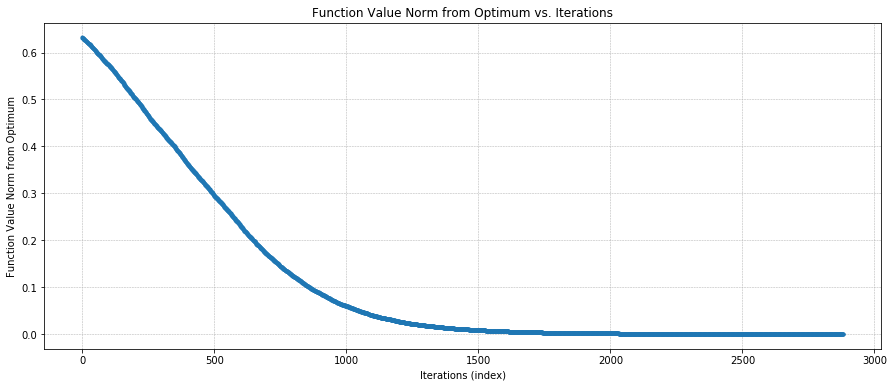

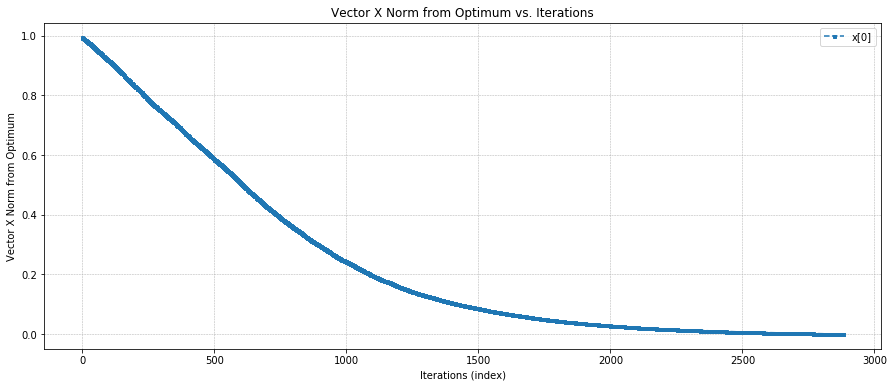

In [18]:
f = lambda x: -1*np.exp(-1*np.square(x-1))
xr,fr,ist=Gradient_Descent(f,np.array([0]))
plot_everything(xr,fr)

### PART 2

Max iter stop iter: 15000 gradient: [ 0.26331648 -0.12860129]
Final Value of Function F: 0.012521886861637747
Final Value of Vector X: [1.11167358 1.23653158]


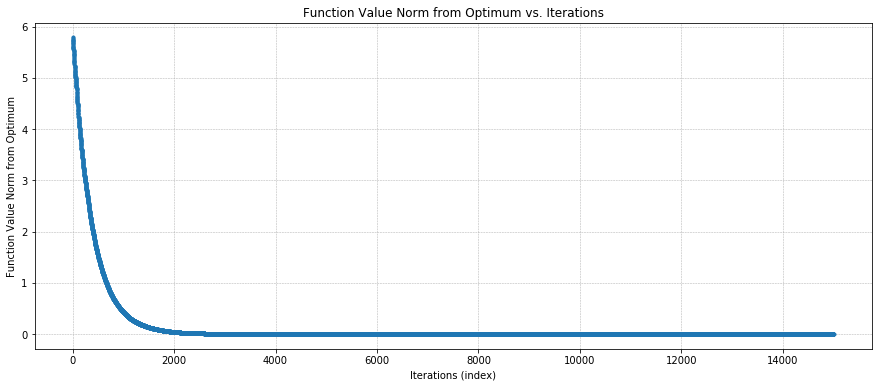

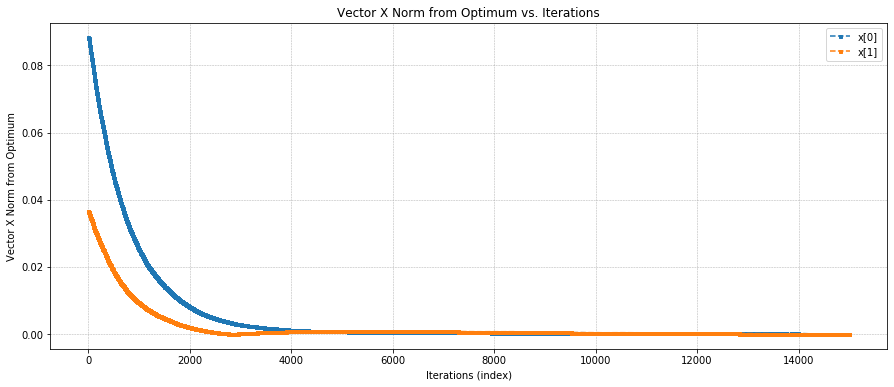

In [16]:
f = lambda x: np.square(1-x[0]) +100*np.square(x[1]-np.square(x[0]))
xr,fr,ist=Gradient_Descent(f,np.array([1.2,1.2]),alpha=0.00001,iter_max=15000)
plot_everything(xr,fr)

### part 3

Max iter stop iter: 5000 gradient: [0.00266689 0.00830008]
Final Value of Function F: [-0.24999841]
Final Value of Vector X: [ 0.25063395 -0.24979438]


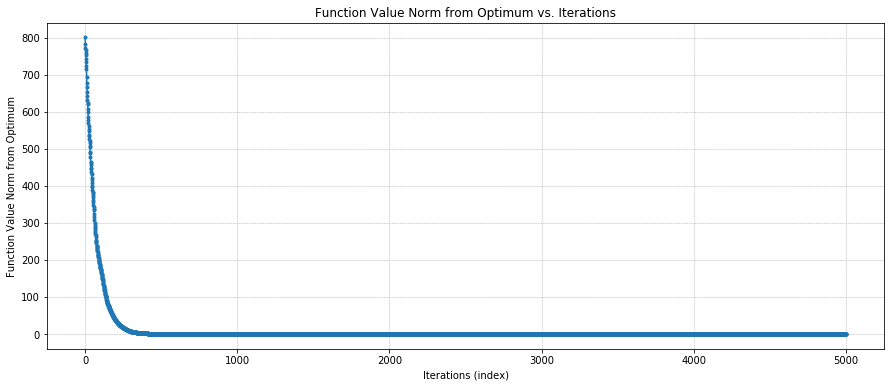

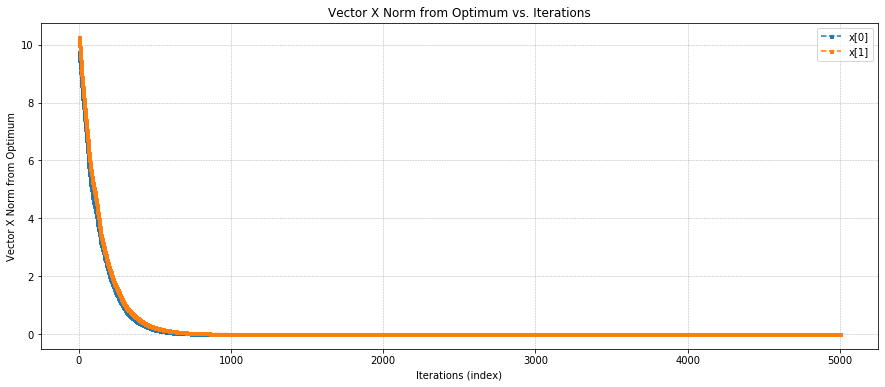

In [19]:
f = lambda x: x.T @ np.array([[3,1],[1,3]]) @ x + np.array([[-1,1]]) @ x
xr,fr,ist=Gradient_Descent(f,np.array([10,10]))
plot_everything(xr,fr)

### part 4

Max iter stop iter: 5000 gradient: [0.00049113 0.0019205  0.00023129]
Final Value of Function F: [-0.12499869]
Final Value of Vector X: [ 0.01789508 -0.01947445 -0.24982423]


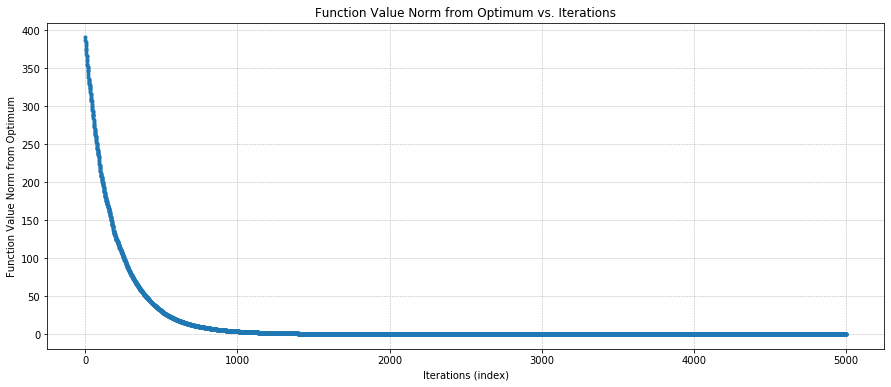

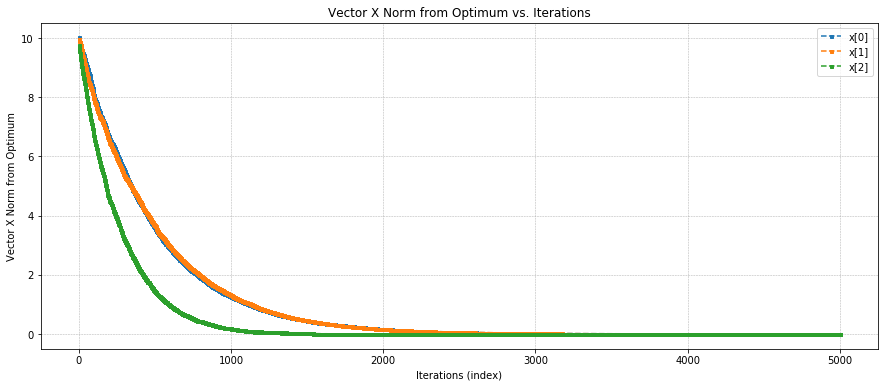

In [20]:
f = lambda x: 0.5*x.T @ np.array([[1,1,0],[1,1,0],[0,0,4]]) @ x + np.array([[0,0,1]]) @ x
xr,fr,ist=Gradient_Descent(f,np.array([-10,-10,-10]))
plot_everything(xr,fr)

### Notable Differences from Gradient Descent: 
* Sampling was failing on the rosebrok ffunction
* Sampling was much less likely to generate near zero gradient for stopping condition.
* Sampling approached the ideal value very quickly, and stayed in that neightbourhood until max iteration
* when sigma, the sampling variance was high, More random fluctuations were noticeble in the function values
* REsults vary, every run, (no fixed seed) and are less accurate than analytical gradients (because N samples is only 10)